# AIM OF ANALYSIS

# The aim of this analysis is to predict the amount of customer churning in a bank

# PROBLEM STATEMENT

# Customer churn or customer defection is the amount of customers that   stopped using your company's
# Products or services during a certain time frame.

# IMPORTANCE OF CUSTOMER CHURN DETECTION

# * it cost more to acquire new customers than it is to retain existing customers
# * an increase in customer retention can create an increase in profit
# * it helps businesses understand why customers don't return for repeat      business
# * customer Churn analysis tells you the customers that leave and predicts the particular time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
churn = pd.read_csv('Churn_Modelling.csv')

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# shape of the data
churn.shape

(10000, 14)

In [5]:
# display the info of the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# checking for null values
churn.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
# Overall statistics of the dataset
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Dropping irrelevant features

In [8]:
churn_new = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [9]:
churn_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Categorical Data 


# It is necessary to drop one column when getting dummy values for a categorical data.
# since one column can be generated completely from the others and hence retaining the
# the column does not add any new information to the modelling process. it is good 
# practice to always drop one of the columns to reduce correlations created among dummy variables.

In [11]:
churn_new = pd.get_dummies(churn_new, drop_first=True)

In [12]:
churn_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Detecting Imbalanced target variable

In [13]:
# Checking the value counts of the target variable items
churn_new['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# The value counts shows that the categories in the target variable are highly inbalanced and this 
# needs to be fixed when splitting the data to ensure model accuracy

<AxesSubplot:ylabel='Exited'>

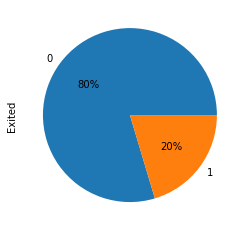

In [14]:
# visualizing the value counts for clarity
churn_new['Exited'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

# in the above bar chart it shows that 80% of customers did not exit (0) the bank
# while 20% of customers exited the bank (1).
# This shows that the bank lost 20% of its customers

In [15]:
# Assigning dependent and independent variables
x = churn_new.drop('Exited', axis = 1)
y = churn_new['Exited']

In [16]:
# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

# Using Stratify helps us to distribute the target variable categories evenly in the test and train sets.

# Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
# Transforming the independent variables using MinMaxScaler
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
# Display transformed independent data
x_train

array([[0.806     , 0.52702703, 0.7       , ..., 0.        , 0.        ,
        1.        ],
       [0.778     , 0.18918919, 0.3       , ..., 1.        , 0.        ,
        1.        ],
       [0.81      , 0.25675676, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.634     , 0.25675676, 0.9       , ..., 0.        , 0.        ,
        0.        ],
       [0.674     , 0.22972973, 0.8       , ..., 0.        , 1.        ,
        1.        ],
       [0.904     , 0.44594595, 0.7       , ..., 0.        , 1.        ,
        1.        ]])

# Support Vector Classifier SVC

In [21]:
from sklearn import svm

In [22]:
svm = svm.SVC()

In [23]:
svm.fit(x_train,y_train)

SVC()

In [24]:
y_pred1 = svm.predict(x_test)
accuracy_score(y_test,y_pred1)

0.848

In [25]:
precision_score(y_test,y_pred1)

0.8872180451127819

# K-neighbours Classifier 

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred2 = knn.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred2)

0.8165

In [31]:
precision_score(y_test,y_pred2)

0.5909090909090909

# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred3 = dtc.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred3)

0.7835

In [36]:
precision_score(y_test,y_pred3)

0.4700460829493088

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier()

In [39]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
y_pred4 = rfc.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred4)

0.862

In [42]:
precision_score(y_test,y_pred4)

0.7695473251028807

# Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc = GradientBoostingClassifier()

In [45]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [46]:
y_pred5 = gbc.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred5)

0.87

In [48]:
precision_score(y_test,y_pred5)

0.7928286852589641

# Visualizing our model performance to determine the best 

In [49]:
final_score = pd.DataFrame({'Models' : ['SVC','KNN','DTC','RFC','GBC'], 
                            'ACC': [accuracy_score(y_test,y_pred1),
                                   accuracy_score(y_test,y_pred2),
                                   accuracy_score(y_test,y_pred3),
                                   accuracy_score(y_test,y_pred4),
                                   accuracy_score(y_test,y_pred5)]})

In [50]:
final_score

,Models,ACC
0,SVC,0.8480
1,KNN,0.8165
2,DTC,0.7835
3,RFC,0.8620
4,GBC,0.8700


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

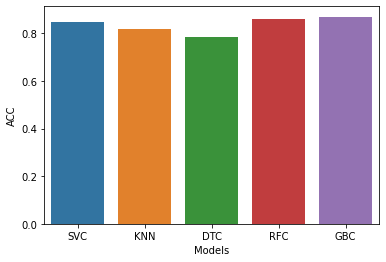

In [51]:
sns.barplot(final_score['Models'],final_score['ACC'])

# This shows that Gradient boosting classifier is the most accurate model for  our prediction

# We are going to inspect the three best models using the x data (independent variables)
# with the highest accuracy and precision to see if they can predict the 80 - 20 % 
# of not_exited to exited given in the main data

In [62]:
x = scaler.fit_transform(x)

In [63]:
# Using Gradient boosting classifier
x_pred = gbc.predict(x)

In [64]:
x_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [69]:
churn['pred_exit']= x_pred

In [70]:
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,pred_exit
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0


<AxesSubplot:ylabel='pred_exit'>

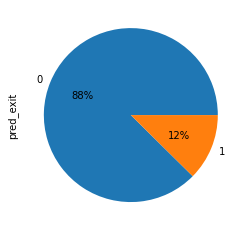

In [71]:
churn['pred_exit'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

# Gradient boosting classifier returned 88 - 12 % of not-exited to exited 
# which is not accurate enough

In [72]:
# Using support vector classifier
x_pred2 = svm.predict(x)

In [73]:
x_pred2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
churn['pred_exit2']= x_pred2

<AxesSubplot:ylabel='pred_exit2'>

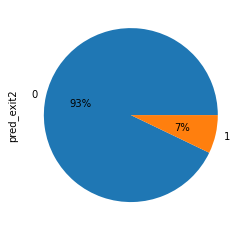

In [78]:
churn['pred_exit2'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

# support vector classifier returned 93 - 7 % of Not-exited to exited
# which is a poor prediction compared to the original

In [79]:
# Using the Random Forest classifier 
x_pred3 = rfc.predict(x)

In [80]:
x_pred3

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [81]:
churn['pred_exit3']= x_pred3

<AxesSubplot:ylabel='pred_exit3'>

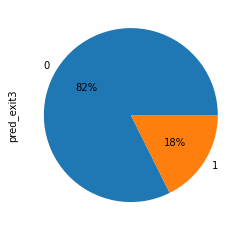

In [82]:
churn['pred_exit3'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

# Random Forest classifier returned 82 - 18 % of Not - exited to exited 
# which is a very accurate prediction with an error of 2% 

In [88]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,pred_exit,pred_exit2,pred_exit3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,0


# pred_exit represents predictions made with Gradient boosting classifier

# pred_exit2 represents predictions made with support vector classifier

# pred_exit3 represents predictions made with Random Forest classifier

# INSIGHTS AND RECOMMENDATIONS
# * From the predictions models Random forest classifier had the best predictions
#   closest to the actual value with an error 0f 2%
# * The random forest classifier is a very accurate model for this prediction and
#   can be used to predict future churns
# * The bank should communicate more with their customers as early as possible to 
#   know if they have any problems that can be fixed immediately
# * The bank should focus more on their old customers by giving them incentives 
#   before they think of churning.
# * Predict customers that are liable to churn quickly and the time it will occur 
#   so preemptive measures can be taken.